# A Comparative Analysis of CO2 Emissions across Countries 

Every year we head about the rise of global warming and those world-ending theories and today I want to see how bad things have been getting over the last few decades. Along with a Time Series since 1960, I also want to find out the differences between countries and look into the reasons why they may exist. 

These are some of the questions we will be trying to answer throughout this notebook:
- How have CO2 Emissions fared in different countries over the last few decades?
- What are the differences in Emissions in each country and what might be the reasons for this? 
- We will try to overlay some important dates and events and see differences that may have occured (for example, signing of the Paris Agreement)

# Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import folium
import geopandas as gpd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/iso-country-codes-global/wikipedia-iso-country-codes.csv
/kaggle/input/co2-emissions-1960-2018/CO2_Emissions_1960-2018.csv


In [2]:
# The df we will use for CO2 emission trends from 1960-2018
df = pd.read_csv('../input/co2-emissions-1960-2018/CO2_Emissions_1960-2018.csv').T
df = df.rename(columns=df.iloc[0])
df = df.drop(['Country Name'], axis=0)

# Data Cleaning

In [3]:
df.head(5)

,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,204.631696,0.90606,0.046057,0.09088,0.100835,1.258195,NaN,0.609268,0.119037,2.383343,...,NaN,0.181947,NaN,3.121158,0.135031,NaN,0.011038,5.727223,NaN,NaN
1961,208.837879,0.922474,0.053589,0.095283,0.082204,1.374186,NaN,0.662618,0.109136,2.458551,...,NaN,0.183099,NaN,3.06809,0.163542,NaN,0.013599,5.832621,NaN,NaN
1962,226.08189,0.930816,0.073721,0.096612,0.210533,1.439956,NaN,0.727117,0.163542,2.538447,...,NaN,0.217694,0.595002,3.114839,0.158377,NaN,0.012729,5.887168,NaN,NaN
1963,214.785217,0.94057,0.074161,0.112376,0.202739,1.181681,NaN,0.853116,0.175833,2.330685,...,NaN,0.196997,0.471849,3.221195,0.184037,NaN,0.014518,5.961337,NaN,NaN
1964,207.626699,0.996033,0.086174,0.133258,0.213562,1.111742,NaN,0.972381,0.132815,2.553442,...,NaN,0.20987,0.864427,3.324046,0.208106,NaN,0.01755,6.332343,0.946606,1.034904


In [4]:
print('Total number of countries:', len(df.columns))
na_values = df.isna().sum()
display(na_values.values)
df = df.dropna(axis=1, how='all')
print('Total number of countries with no NaN values:', len(df.columns))

Total number of countries: 266


array([29,  0,  0,  0,  0,  0, 30,  0,  0,  0, 30, 59,  0,  0,  0, 30,  2,
        0,  0,  0,  0,  0,  0,  0, 30, 30,  0, 29,  0,  0,  0,  0, 10, 12,
        0,  0,  0,  0, 59,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       59, 29,  0, 30, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       30, 30,  0, 30,  0,  0,  0,  0,  0,  0, 29, 30,  0,  0, 30,  0, 29,
        0,  0,  0,  0,  0,  0, 29,  0, 59,  0,  0, 29,  0,  0, 30,  0,  0,
        0,  0,  0,  0,  0,  0, 59,  0, 59,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 30,  0, 30,  0,  1,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 30,  0,  0,  0, 30,  0, 30,  0, 30, 29, 59,  0, 59, 30,  0, 11,
        0,  0, 30,  0, 30,  0,  0,  0,  0, 30,  0, 59,  0,  0,  0,  4,  0,
        0, 31, 29,  0,  0,  0,  0,  0,  0,  4,  0,  0,  4,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 59,  0,  0,  0, 59,  0,  0, 29,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 59,  0, 30,  0, 30,  0,  0,  0,  0,
       30, 30,  0,  2, 59

Total number of countries with no NaN values: 250


## Further Cleaning

As you saw, we had 16 countries with no recorded data. While we did get rid of those, we still have some countries where almost half the data is missing. We will ignore this missing data for now but we can always revisit this later.

Another point to note is that emissions in Aruba generally seem to be at around 200 which is over 20-50 times the amount of emission of the rest of the world. This leads me to believe that the numbers for Aruba must be a mistake and I will be removing them from the data. But first, let's see if there are any other such outliers.

In [5]:
df = df.astype(float)

In [6]:
df.describe()

,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,"Venezuela, RB",British Virgin Islands,Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
count,30.000000,59.000000,59.000000,59.000000,59.000000,59.000000,29.000000,59.000000,59.000000,59.000000,...,59.000000,28.000000,59.000000,57.000000,59.000000,59.000000,59.000000,59.000000,55.000000,55.000000
mean,184.079829,1.089405,0.149382,0.440692,0.687540,1.660433,6.778152,2.923164,30.416576,3.544621,...,5.687312,2.363112,0.716099,0.530864,4.109284,0.693014,0.442130,7.497467,0.479936,1.201970
std,84.724762,0.157525,0.085583,0.147548,0.329161,0.643504,0.688945,1.089531,20.916706,0.512579,...,0.521609,1.110870,0.652798,0.154410,0.440680,0.371951,0.369435,1.136301,0.313848,0.302564
min,2.868274,0.900399,0.037055,0.090880,0.082204,0.470098,5.807128,0.609268,0.109136,2.330685,...,4.225144,0.398025,0.181947,0.326525,3.068090,0.135031,0.011038,5.727223,0.158363,0.613916
25%,169.081608,0.971170,0.073941,0.443857,0.476051,1.258155,6.104134,2.340655,20.406460,3.278312,...,5.336008,1.787895,0.287286,0.436545,3.805353,0.282534,0.072521,6.577222,0.219073,0.910479
50%,199.774616,1.033908,0.149651,0.476438,0.640966,1.572251,6.733479,3.091803,28.994996,3.642232,...,5.780234,2.451580,0.404750,0.486581,4.281006,0.711368,0.326682,7.446834,0.349232,1.229248
75%,232.217652,1.188124,0.207444,0.515941,0.912209,2.001541,7.344262,3.417984,33.133602,3.862388,...,6.064246,3.062351,0.936470,0.586726,4.472535,0.929421,0.788088,8.055625,0.672690,1.422052
max,360.853233,1.431964,0.407074,0.648273,1.285365,2.898209,7.952286,4.617964,101.053155,4.359886,...,7.009414,4.085794,2.698806,1.074339,4.696086,1.631588,1.139166,9.922518,1.261960,1.713321


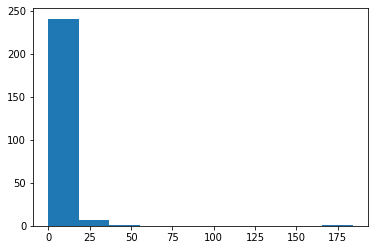

Mean of total emissions across the world: 4.883085179630669
Number of countries with a mean emission > 50: 1


In [7]:
# The mean of CO2 Emissions in each country:
mean_list = df.describe().loc['mean'].values
plt.hist(mean_list)
plt.show()
print('Mean of total emissions across the world:', np.mean(mean_list))
print('Number of countries with a mean emission > 50:', len([round(x) for x in mean_list if x > 50]))

Aruba seems to be the only country with the extremely high numbers. If no other countries (not even neighbouring ones) seem to have such numbers, they probably are from incorrect logging of data. Let's remove Aruba now.

In [8]:
df = df.drop('Aruba', axis=1)

# Exploratory Data Analysis

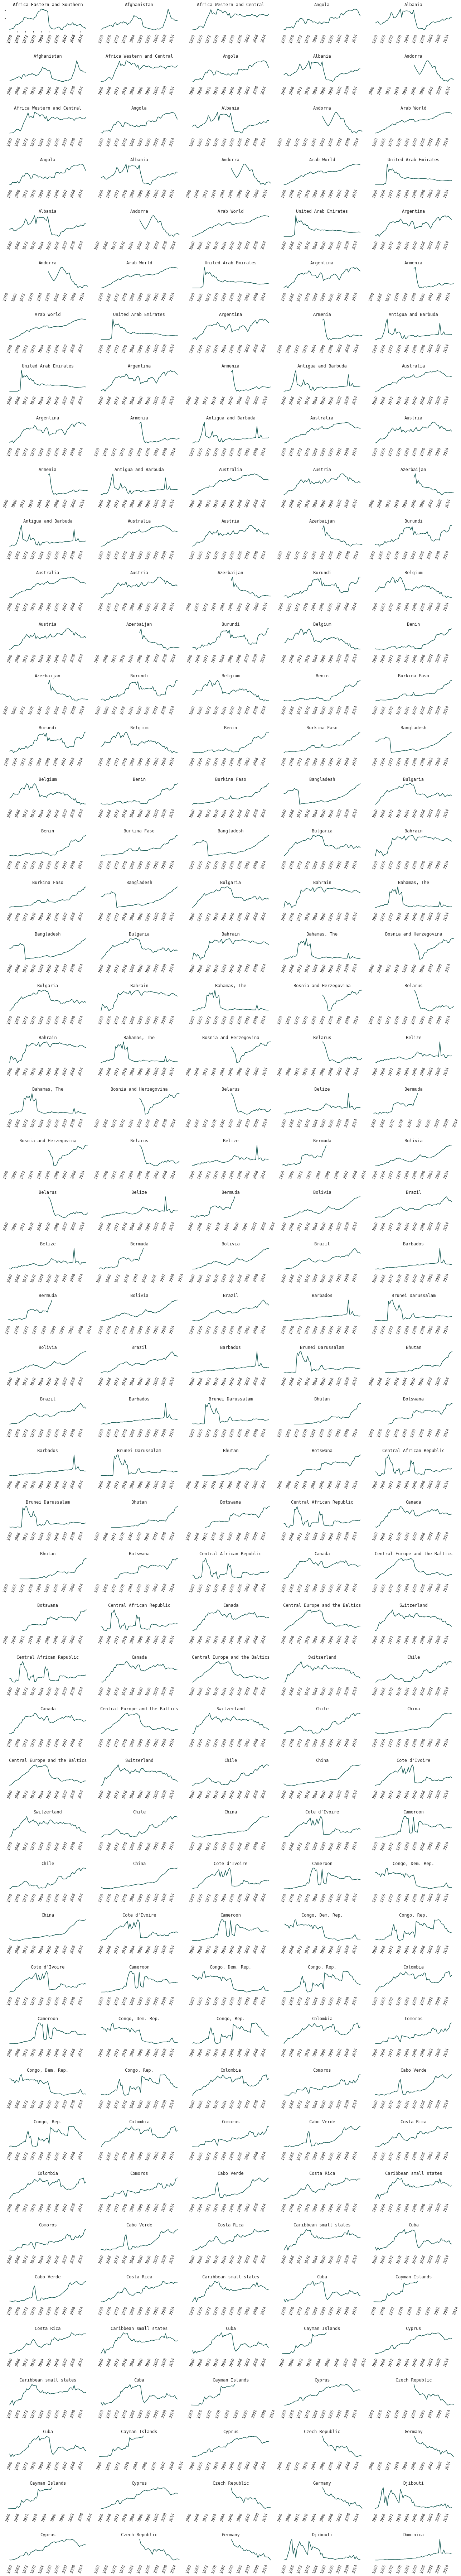

In [9]:
fig = plt.figure(figsize = (18, 100))
spec = gridspec.GridSpec(ncols=5, nrows=50, figure=fig)

countries = df.columns.tolist()[:249]

for i in range(5):
    for j in range(50):
        ax = fig.add_subplot(spec[j,i])
        sns.set_style("white")
        plt.title(countries[i+j], size = 12, fontname = 'monospace')
        ax.plot(df[countries[i+j]].index, df[countries[i+j]].values, color='#1a5d57')
        ax.set_xticklabels(df[countries[i+j]].index[::6], rotation=70)
        ax.set_xticks(df[countries[i+j]].index[::6])
        ax.set_yticklabels([])
        for s in ['top', 'right', 'bottom', 'left']:
            ax.spines[s].set_visible(False)

fig.tight_layout(h_pad = 3)
plt.show()

# Comparative Analaysis

However, these figures only show us how CO2 Emissions have progressed over the 60 years. They don't show us how big the effect has been in each country. For example, as we saw earlier emissions in Aruba were crossing 200 which is over 20000% that of any other country and we wouln't have seen that dramatic increase in these individual plots. 

This is why we need a comparative analysis of some countries (it's hard to do this for all 249 countries we're considering). So, let's set up the dataframe we will need for our next steps. Going forward, my idea is to compare the CO2 emissions in 1960, 1980, 2000 and 2018 pictured on a heatmap of the world. This would allow us to get a better idea of the differences between the countries.

In [10]:
# To use a world heat map, we need to combine our data with country codes which can be read by the geopandas library.
# For this, we use another dataset from Kaggle - "Iso Country Codes Global"

country_df = df.T.reset_index()
country_code = pd.read_csv('../input/iso-country-codes-global/wikipedia-iso-country-codes.csv')

country_df = country_df.rename(columns={'index': 'country'})
country_code = country_code.rename(columns={'English short name lower case': 'country'})

df_global = country_df.merge(country_code, how='left', left_on=['country'], right_on=['country'])
df_global = df_global.rename(columns={'Alpha-3 code': 'iso_a3'})

In [11]:
df_global.head(5)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,Alpha-2 code,iso_a3,Numeric code,ISO 3166-2
0,Africa Eastern and Southern,0.906060,0.922474,0.930816,0.940570,0.996033,1.047280,1.033908,1.052204,1.079727,...,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541,NaN,NaN,NaN,NaN
1,Afghanistan,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,0.107399,0.123409,0.115142,...,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151,AF,AFG,4.0,ISO 3166-2:AF
2,Africa Western and Central,0.090880,0.095283,0.096612,0.112376,0.133258,0.184803,0.193676,0.189305,0.143989,...,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544,NaN,NaN,NaN,NaN
3,Angola,0.100835,0.082204,0.210533,0.202739,0.213562,0.205891,0.268937,0.172096,0.289702,...,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380,AO,AGO,24.0,ISO 3166-2:AO
4,Albania,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,1.333055,1.363746,1.519551,...,1.654524,1.806789,1.759987,1.714126,1.948872,1.939732,AL,ALB,8.0,ISO 3166-2:AL


In [12]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [13]:
mapped = world.merge(df_global, how='left', left_on='iso_a3', right_on='iso_a3')
mapped = mapped.fillna(0)
mapped = mapped.drop(['Alpha-2 code', 'Numeric code','ISO 3166-2', 'pop_est', 'continent', 'country'], axis=1)
mapped.head(5)

,name,iso_a3,gdp_md_est,geometry,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.493929,0.414204,0.547868,0.554711,0.944142,0.742948,...,1.136316,1.349126,1.285539,1.190662,1.305450,1.511922,1.738366,1.994484,2.062772,2.150562
1,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.082444,0.068047,0.071950,0.073218,0.091548,0.099910,...,0.137671,0.155818,0.178659,0.209763,0.222964,0.214569,0.227067,0.205847,0.207829,0.205635
2,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",10.770847,10.627898,11.130627,11.132102,12.305370,12.814001,...,15.486682,15.733914,15.950225,15.761263,15.858129,15.854138,15.651386,15.244747,15.385291,15.497025
4,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",15.999779,15.681256,16.013937,16.482762,16.968119,17.451725,...,16.818868,17.434196,16.599404,15.771145,16.102958,16.026379,15.535342,15.131747,14.805882,15.240875


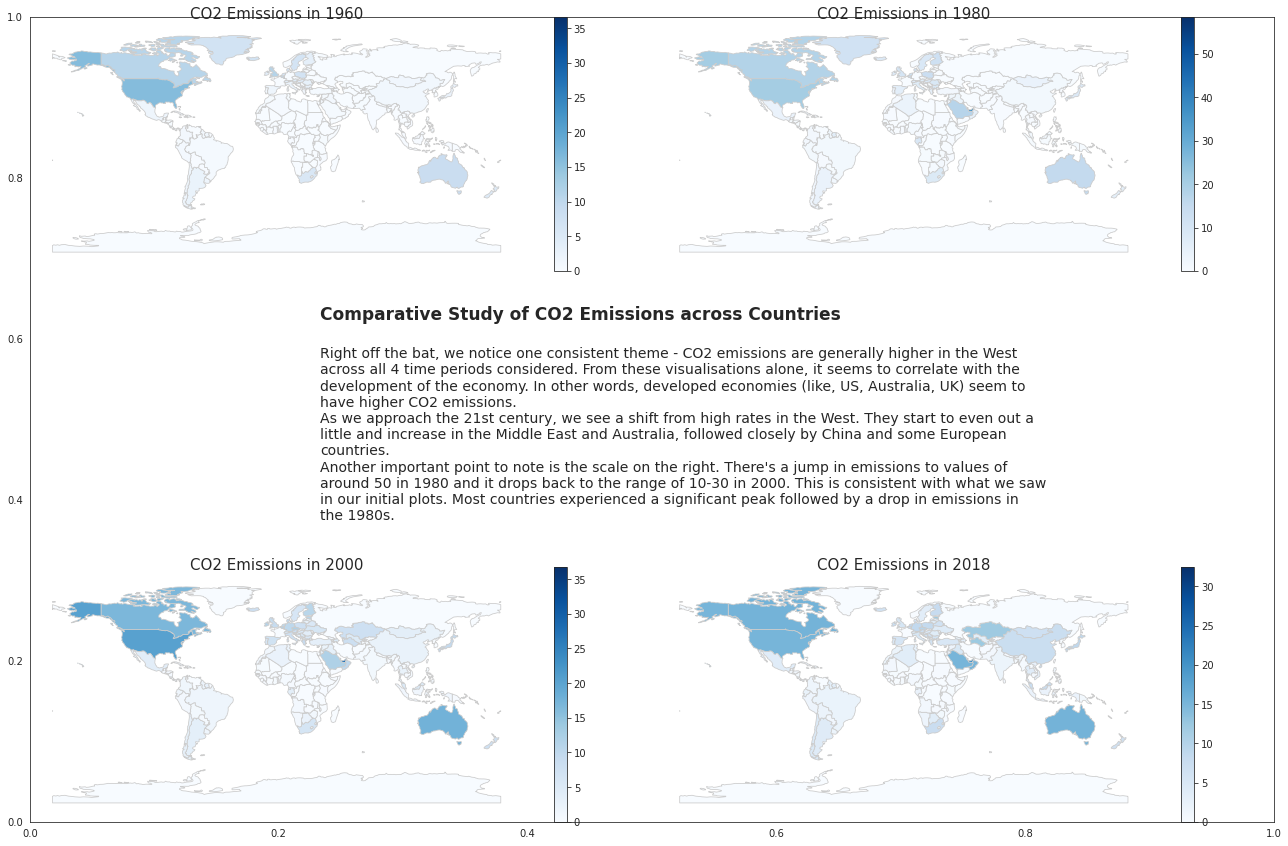

In [14]:
import geoplot
import mapclassify

# Fig Setup
fig, ax = plt.subplots(1, figsize=(18,12))
spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)

def create_map(year, posx, posy):
    ax = fig.add_subplot(spec[posx,posy])
    mapped.plot(column=year, cmap='Blues', linewidth=0.8, ax=ax, edgecolors='0.8', legend=True)
    ax.set_title('CO2 Emissions in {}'.format(year), fontdict={'fontsize':15})
    ax.set_axis_off()

create_map('1960', 0, 0)
create_map('1980', 0, 1)
create_map('2000', 2, 0)
create_map('2018', 2, 1)


fig.text(0.25, 0.62, 'Comparative Study of CO2 Emissions across Countries', fontsize=17, fontweight='bold', fontfamily='sans-serif')
fig.text(0.25, 0.37, 
'''Right off the bat, we notice one consistent theme - CO2 emissions are generally higher in the West
across all 4 time periods considered. From these visualisations alone, it seems to correlate with the 
development of the economy. In other words, developed economies (like, US, Australia, UK) seem to 
have higher CO2 emissions.
As we approach the 21st century, we see a shift from high rates in the West. They start to even out a 
little and increase in the Middle East and Australia, followed closely by China and some European
countries.
Another important point to note is the scale on the right. There's a jump in emissions to values of 
around 50 in 1980 and it drops back to the range of 10-30 in 2000. This is consistent with what we saw 
in our initial plots. Most countries experienced a significant peak followed by a drop in emissions in
the 1980s.
'''
, fontsize=14, fontweight='light', fontfamily='sans-serif')


fig.tight_layout()
plt.show()

## Comparative Study Conclusions 

Clearly, we saw higher CO2 emissions in developed countries as opposed to developing countries with a drop in the values for Greenland over the 40 years. Based on the data provided, it seems there is some correlation between a country's development and CO2 rates but we cannot be sure about this without a deeper look into this and some correlation plots.

# Possible Policies/Global Phenomenons

I'm no expert here but if most countries seem to have a significant drop in CO2 Emissions in the same time period of 1980-1995, it's likely these are due to some global phenomenon - either some treaties that may have been signed (like the Paris Agreement, 2016) or there was a big shift in production environments across the world because this time period co-incides with third era of globalisation from 1980-2000.

Some of the treaties that aimed at reducing CO2 emissions / global warming were:
- Paris Agreement, 2016
- Doha Agreement, 2012
- Kyoto Protocol, 1997

Again, these are just my guesses for the reasons and I could be wrong. I'd love to hear your opinion on what they could be and I could try to add to the analysis from external data sources!

# Remarks

Thank you for taking the time to read this analysis. I would love to hear your feedback in the comments in any way I could improve on this notebook. If you liked it, I'd really appreciate it if you could upvote the project :)